## Övning 2.2

Uppgiften lyder
<img src="img/exe2.1.png">

Vi räknar först ut stickprovets medelvärde

In [1]:
from math import *
stickprov = [0.07,0.07,0.08,0.07,0.07,0.08,0.08,0.09,0.08]

In [2]:
summa = 0.0
antal = 0
for punkt in stickprov:
    summa += punkt
    antal += 1
medel = summa/antal
print medel

0.0766666666667


Sedan räknar vi ut standardavvikelsen av stickprovet

In [3]:
kvadrat_summa = 0.0
for punkt in stickprov:
    kvadrat_summa += (punkt-medel)**2
varians=kvadrat_summa/(antal-1)
standardavvikelse = sqrt(varians)
print standardavvikelse

0.00707106781187


Vidare, relativa standardavvikelsen:

In [4]:
relativ_stdv = standardavvikelse/medel
print relativ_stdv

0.0922313192852


### Visualisering

([<matplotlib.axis.YTick at 0x7fa516650810>,
 <a list of 6 Text yticklabel objects>)

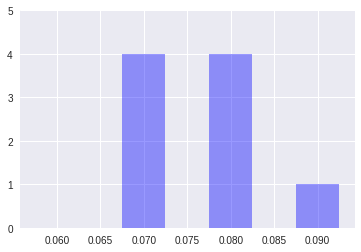

In [17]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame(stickprov)
sns.distplot(df, bins=[(0.0575+i*0.005) for i in range(8)],kde=False, color="b")
plt.yticks(np.arange(0.0, 6.0, 1.0))